# Homework #1   Due date: 27 October 2022, 11:59 PM

## Q1) One feature regression for Boston data. 
Choose one of the features in Boston data, try to select one that is mostly correlated (or inversely correlated) with the target. Fit a line with linear regression (you can use built-in LinearRegression() method). What is the equation of the fitting line? Please plot your data points (chosen feature vs. target) and plot your fitting line on it.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.datasets import load_boston
boston_dataset = load_boston()

In [2]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


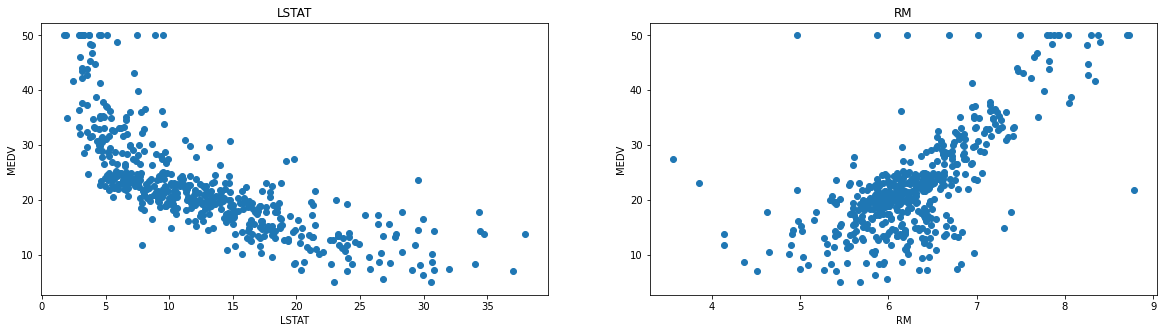

In [3]:
boston['MEDV'] = boston_dataset.target
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = boston['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

## Q2) Another metric for performance evaluation
We have seen that LinearRegression() by *sklearn* provides a method called *score* which outputs a value with a maximum of 1 (the larger the better), which is good to evaluate the performance. 
Another common performance metric is mean sum of squared error (MSE):

$$\frac{1}{m} \sum_{i=1}^m \left(\underbrace{\theta^T x^{(i)}}_{\text{Prediction}} - \underbrace{y^{(i)}}_{\text{Target}}\right)^2$$

Please implement this metric and compute it when Boston data with all features are used. lr.score gave 0.74. What is the MSE?

Important restriction: Do NOT use *mean_squared_error* module from *sklearn.metrics*.

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import datasets
from sklearn import linear_model

In [5]:
boston_ds = datasets.load_boston()
X = boston_ds.data
y = boston_ds.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
reg = LinearRegression().fit(X, y)
regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)

LinearRegression()

In [7]:
reg.score(X, y)

0.7406426641094095

In [8]:
pipeline = make_pipeline(StandardScaler(), LinearRegression())
pipeline.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [9]:
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

In [10]:
print("Mean squared error: %.2f" % np.mean((reg.predict(X_test) - y_test) ** 2))

Mean squared error: 19.65


## Q3) Splitting the dataset
In the lecture we did training and evaluation (score) on the whole Boston dataset. This is bad. Use the code in Week 1 Python Notebook to:
- shuffle the data,
- select 60% of the data as a training set (do the line fitting), 40% as a test set,
- what is the score on the test data?
- what is the mean squared error?

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.datasets import load_boston
boston_dataset = load_boston()
from sklearn.datasets import load_iris

In [12]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


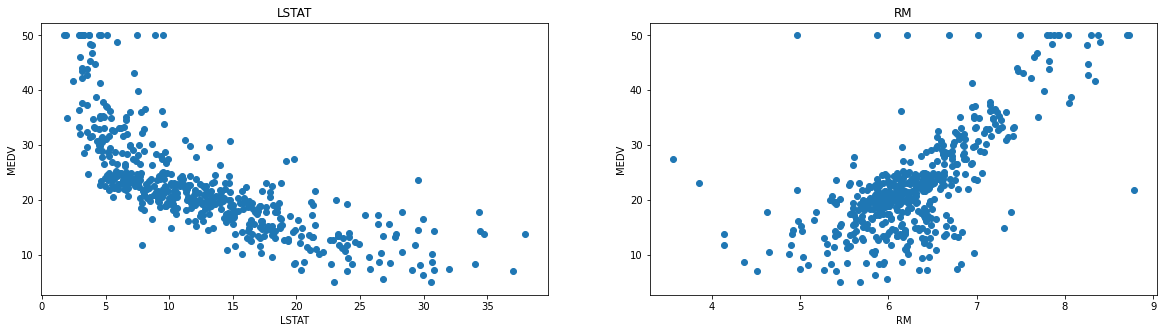

In [13]:
boston['MEDV'] = boston_dataset.target
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = boston['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

In [14]:
train_x = x[:60]
train_y = y[:60]

test_x = x[60:]
test_y = y[60:]

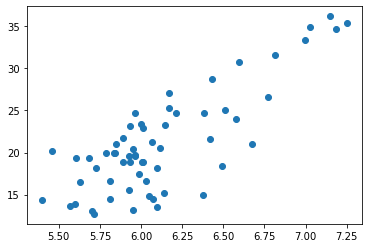

In [15]:
plt.scatter(train_x, train_y)
plt.show()

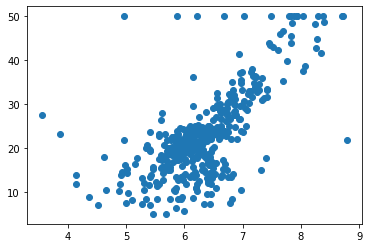

In [16]:
plt.scatter(test_x, test_y)
plt.show()

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [22]:
boston = datasets.load_boston()
boston_X = boston.data[:, 2]
boston_X = boston_X[:, np.newaxis]
boston_y = boston.target[:, np.newaxis]

In [23]:
regr = linear_model.LinearRegression()
regr.fit(boston_X, boston_y)

LinearRegression()

In [24]:
boston_y_pred = regr.predict(boston_X)

In [25]:
print("Mean squared error: %.2f" % mean_squared_error(boston_y, boston_y_pred))

Mean squared error: 64.67
